### Project Web Social Analytics
#### Google Play Store

#### Cleaning and processing of data:
### The dataset we have originally is binned, cleaned and processed, using Excel and the program below. 
### The dataset used below is processed and cleaned for the visualization and programing purposes. 
### Created column for million_installs ( categorical variable 0|1) Using Excel for (Installs > 1000,000==1) else 0.
### Removed MB, KB from Size column.
### Parsed date Using Python program below.

In [34]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [35]:
# Initial dataset is cleaned and categorical columns are formed that can be further used for building models. 

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
#Import Playstore data set
googledata = pd.read_csv("Updated_File_GooglePlayStore.csv", parse_dates=['Last_Updated'])

In [37]:
#explore data
googledata.head(5)

,App,Category,Rating,Reviews,Size,Installs,Million_Install,Type,Price,Content_Rating,Genres,Last_Updated
0,American Muscle Car Race,AUTO_AND_VEHICLES,3.9,129,3500.0,"100,000",0,Free,0.0,Everyone,Auto & Vehicles,2018-07-26
1,Be the Manager 2018 - Football Strategy,SPORTS,4.3,7557,7.4,"100,000",0,Free,0.0,Everyone,Sports,2018-03-12
2,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36880,4.0,"1,000,000",1,Free,0.0,Everyone,Communication,2018-07-06
3,Hello Kitty Nail Salon,GAME,4.2,369203,2400.0,50000000,1,Free,0.0,Everyone,Casual;Pretend Play,2018-04-17
4,Learn English Daily,FAMILY,4.5,7881,5300.0,"500,000",0,Free,0.0,Everyone,Education,2018-05-06


### we can paste this graph for presenting avg rating of application.

### Calculating Average rating of application, to get an idea about what is avg rating, and what conclusion can be drwan from this.

In [5]:

data = [go.Histogram(
        x = googledata.Rating,
        xbins = {'start': 2, 'size':0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(googledata['Rating']))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average app rating =  4.1738517272609625


#### Help in studying if graph is left skewed and right skewed.

Mean app rating = 4.17
Median app rating = 4.3


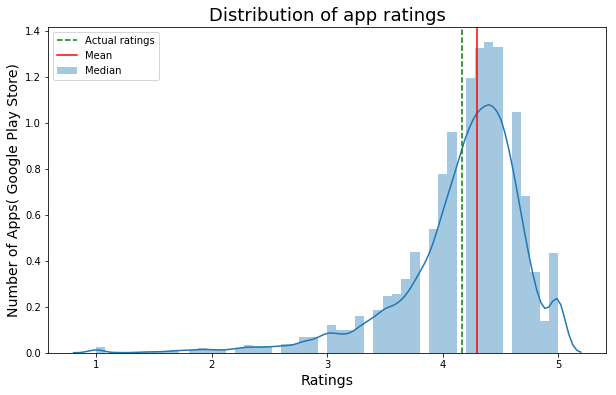

In [7]:
# Average and median rating of apps
mean = round(googledata['Rating'].mean(), 2)
median = round(googledata['Rating'].median(), 2)
print(f'Mean app rating = {mean}', f'Median app rating = {median}',sep= '\n')
# Distribution of apps according to their ratings
rating_histogram = sns.distplot(googledata["Rating"], kde = True)
rating_histogram.axvline(mean, color='g', linestyle='--')
rating_histogram.axvline(median, color='r', linestyle='-')
plt.legend({'Actual ratings': rating_histogram, 'Mean':mean,'Median':median})
plt.gcf().set_size_inches( 10, 6)
plt.xlabel("Ratings", fontsize = 14)
plt.ylabel("Number of Apps( Google Play Store)", fontsize = 14)
plt.title('Distribution of app ratings', fontsize = 18)
plt.show()

### This visualization  is for exploring dataset.

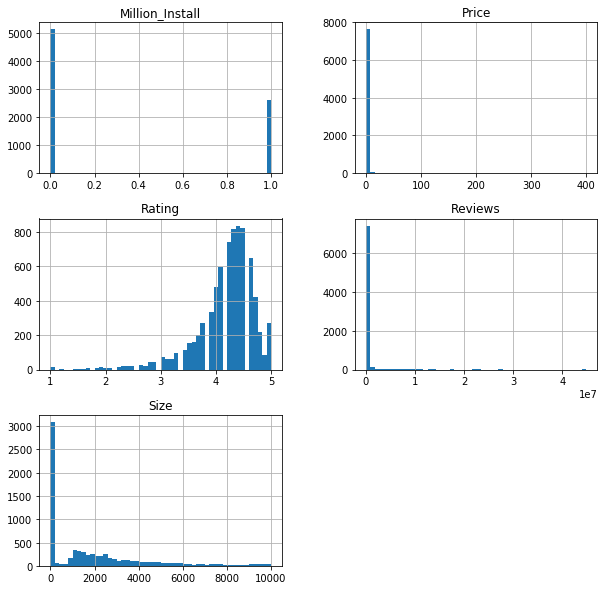

In [8]:
#Visualize the data to get some insight for the numerical variables
%matplotlib inline
import matplotlib.pyplot as plt
googledata.hist(bins=50, figsize=(10,10))
plt.show()
#we can ignore Installs_transformed and million_installs
#we might be worried that price and reviews will lead to overfitting but we will run the model with them to find out

### For finding out about what application dominates in play store, by counting its frequency.

In [38]:
#converting categorical values to dummy
googledata= pd.get_dummies(googledata,columns=['Category', 'Type', 'Rating', 'Genres','Content_Rating'])
googledata.head()

,App,Reviews,Size,Installs,Million_Install,Price,Last_Updated,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone,Content_Rating_Mature,Content_Rating_Mature,Content_Rating_Teen,Content_Rating_Unrated
0,American Muscle Car Race,129,3500.0,"100,000",0,0.0,2018-07-26,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,Be the Manager 2018 - Football Strategy,7557,7.4,"100,000",0,0.0,2018-03-12,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Firefox Focus: The privacy browser,36880,4.0,"1,000,000",1,0.0,2018-07-06,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Hello Kitty Nail Salon,369203,2400.0,50000000,1,0.0,2018-04-17,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Learn English Daily,7881,5300.0,"500,000",0,0.0,2018-05-06,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

Text(0.5,1,'Count of app in each category')

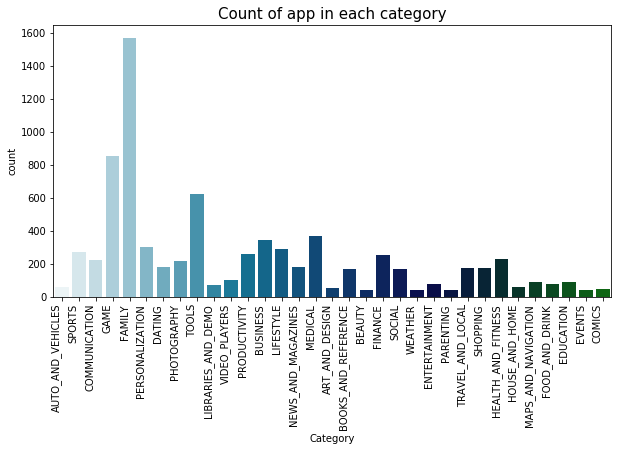

In [9]:
plt.figure(figsize=(10,5))
g1 = sns.countplot(x="Category",data=googledata, palette = "ocean_r")

g1.set_xticklabels(g1.get_xticklabels(), rotation=90, ha="right")
g1
plt.title('Count of app in each category',size = 15)

### Trying different visualization to find out if their exits any relation between installs, and reviews. 

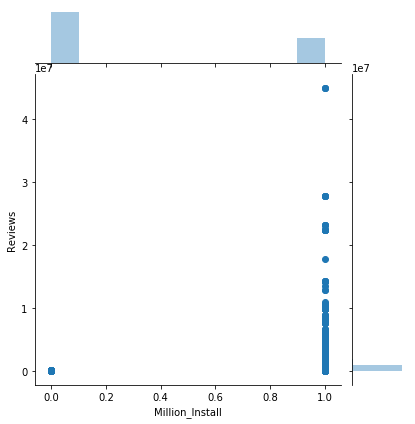

In [10]:
sns.jointplot(x='Million_Install',y='Reviews',data=googledata,kind='scatter')

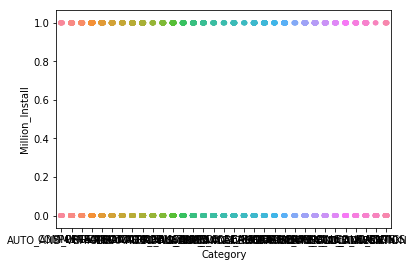

In [11]:
sns.stripplot(x="Category", y="Million_Install", data=googledata)

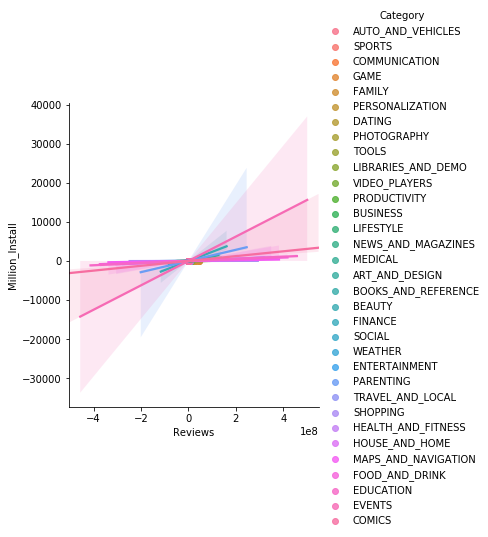

In [12]:
sns.lmplot(x='Reviews',y='Million_Install',data=googledata,hue='Category')

In [13]:
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

#### Q2) What sizing strategy is followed?
#### What kind of apps are users most likely to download?
#### What is the optimal size for top-rated apps?

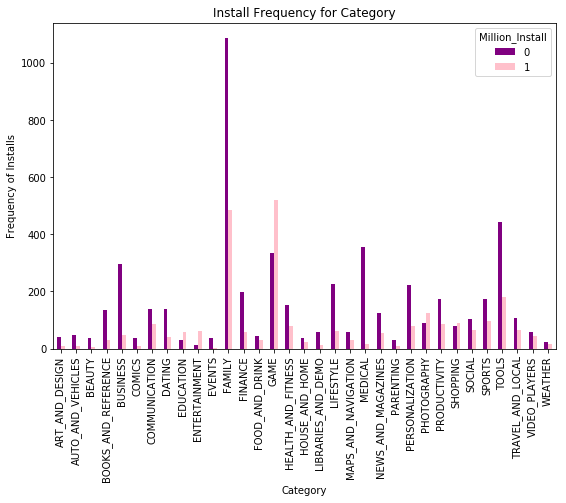

In [14]:
%matplotlib inline
pd.crosstab(googledata.Category,googledata.Million_Install).plot(kind='bar', color=['purple','pink'],figsize=(9,6))

plt.title('Install Frequency for Category')
plt.xlabel('Category')
plt.ylabel('Frequency of Installs')
plt.show()

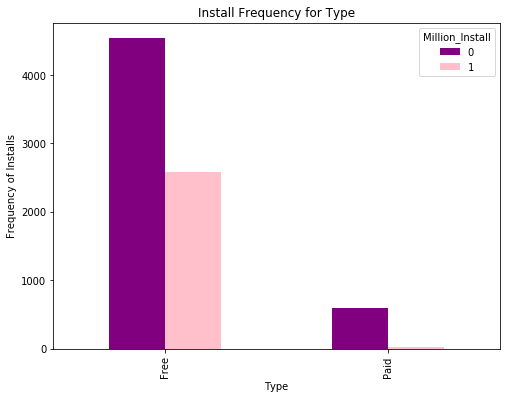

In [15]:
#Download for free vs paid
%matplotlib inline
pd.crosstab(googledata.Type,googledata.Million_Install).plot(kind='bar', color=['purple','pink'], figsize=(8,6))
plt.title('Install Frequency for Type')
plt.xlabel('Type')
plt.ylabel('Frequency of Installs')
plt.show()

In [16]:
#This is the basic exploratory analysis to look for any evident patterns or relationships between the features.

In [17]:
#Which category has the highest share of (active) apps in the market?
number_of_apps_in_category = googledata['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

In [18]:
#Almost all app categories perform decently. Health and Fitness and Books and Reference produce the highest quality apps with 50% apps having a rating greater than 4.5. This is extremely high!
#On the contrary, 50% of apps in the Dating category have a rating lesser than the average rating.
#A few junk apps also exist in the Lifestyle, Family and Finance category.

### Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.
#### % of free app and paid, and how does it effect download. 
#### How does the size of paid app and free app vary?

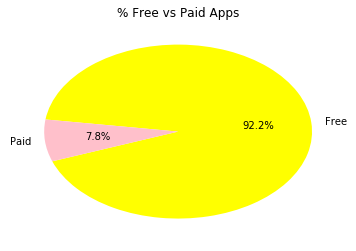

In [19]:
size=[8891,750]
sentiment = ['Free', 'Paid']
colors = ['yellow', 'pink']
plt.pie(size, labels=sentiment, colors=colors, startangle=200, autopct='%.1f%%')
plt.title('% Free vs Paid Apps')
plt.show()

In [20]:
list_1 = ['Category', 'Installs', 'Type',
        'Rating']

In [21]:
def bar_plot(x,y,y_label,x_label,title,color,ax):
    # plt.figure(figsize=(10,5))
    bar = sns.barplot(x = x,y=y,ax=ax,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar

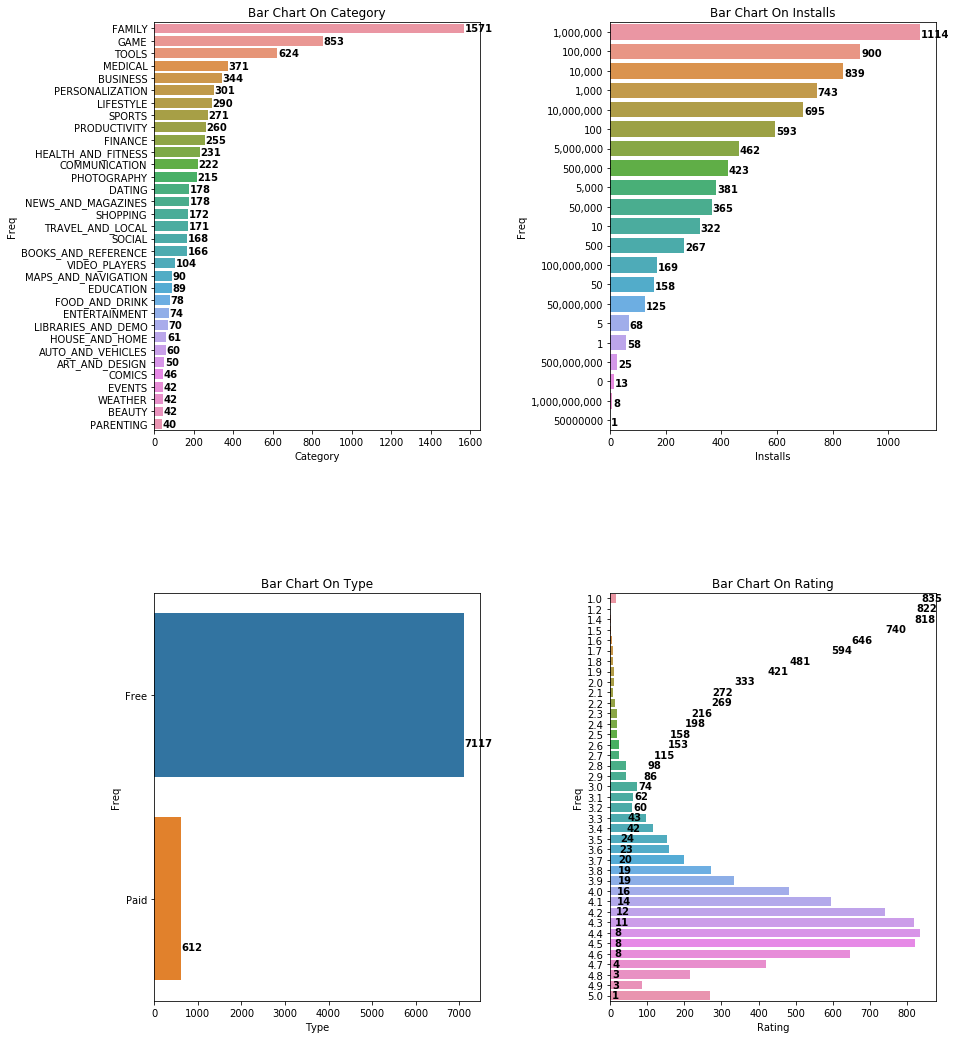

In [22]:
fig = plt.figure(figsize=(14,18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1
for names in list_1:
    ax1 = fig.add_subplot(2, 2, i)
    df2 = googledata[names].value_counts()
    df2 = df2.reset_index()
    bar_plot(x = df2[names],y = df2['index'],y_label = 'Freq',title = 'Bar Chart On {}'.format(names),color='red',
             ax=ax1,x_label=names)
    i += 1

#### Relation of size and rating of applications are related, or what effect they have in the pricing startegy of apps?

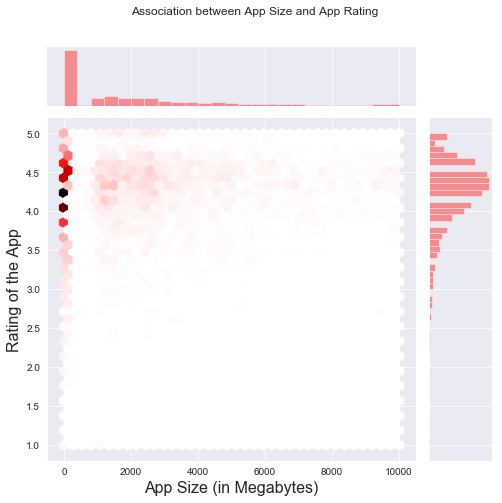

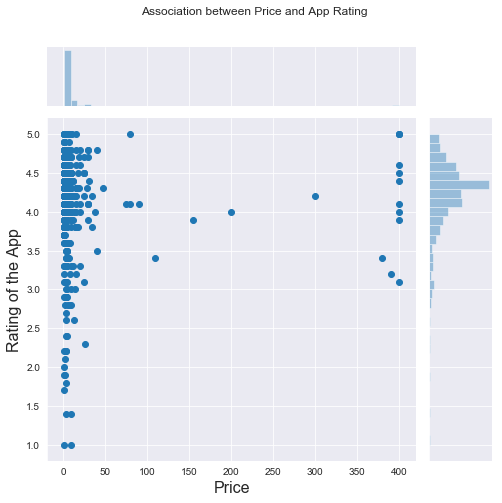

In [23]:
sns.set_style("darkgrid")

# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = googledata[(~googledata['Rating'].isnull()) & (~googledata['Size'].isnull())]

#Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex', height = 7,color='red')
plt1.set_axis_labels('App Size (in Megabytes)', 'Rating of the App', fontsize=16)
plt.subplots_adjust(top=0.9)
plt1.fig.suptitle('Association between App Size and App Rating')

paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'], height = 7)
plt2.set_axis_labels('Price', 'Rating of the App', fontsize=16)
plt.subplots_adjust(top=0.9)
plt2.fig.suptitle('Association between Price and App Rating')
plt.show()

In [24]:
#Paid apps have a relatively lower number of downloads than free apps. However, it is not too bad.

#### Some Conclusions:

#### Average rating of (active) apps on Google Play Store is 4.17.
#### Users prefer to pay for apps that are light-weighted. Thus, a paid app that is bulky may not perform well in the market.
#### #Most of the top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.
#### Most of the top rated apps are optimally priced between ~1 𝑡𝑜 30  - neither too cheap nor too expensive.
#### Medical and Family apps are the most expensive and even extend upto 80.
### Users tend to download a given app more if it has been reviewed by a large number of people.
#### Health and Fitness apps receive more than 85% positive reviews. Game and Social apps receive mixed feedback - 50% positive and 50% negative.
#### Users are more grim and harsh while reviewing free apps than paid apps.

## Model 1 : Decision Tree 

In [31]:
#converting categorical values to dummy
googledata= pd.get_dummies(googledata,columns=['Category', 'Type', 'Rating', 'Genres','Content_Rating'])
googledata.head()

,App,Reviews,Size,Installs,Million_Install,Price,Last_Updated,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone,Content_Rating_Mature,Content_Rating_Mature,Content_Rating_Teen,Content_Rating_Unrated
0,American Muscle Car Race,129,3500.0,"100,000",0,0.0,2018-07-26,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,Be the Manager 2018 - Football Strategy,7557,7.4,"100,000",0,0.0,2018-03-12,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Firefox Focus: The privacy browser,36880,4.0,"1,000,000",1,0.0,2018-07-06,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Hello Kitty Nail Salon,369203,2400.0,50000000,1,0.0,2018-04-17,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Learn English Daily,7881,5300.0,"500,000",0,0.0,2018-05-06,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
#Using Decision Tree Classifier to create a model to determine the best parameters
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
X = googledata.drop(['Million_Install','App', 'Size', 'Installs', 'Last_Updated'], axis=1)
y = googledata['Million_Install']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3,4,5,6,7,8]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv,
return_train_score=True, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             return_train_score=True, scoring='accuracy')

In [49]:
model.fit(X_train, y_train)
y_test_hat=model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
lcm = metrics.confusion_matrix(y_test,y_test_hat)
log_f1= metrics.f1_score(y_test, y_test_hat, average= "weighted")    #F-1 Score
log_accuracy = metrics.accuracy_score(y_test, y_test_hat) #confusion matrix
print("-------------------------------------------------------")
print("Confusion matrix is: \n", lcm)
print("-------------------------------------------------------")
print("F1 score is: {}".format(log_f1))
print("-------------------------------------------------------")
print("Accuracy score is: {}".format(log_accuracy))
print("-------------------------------------------------------")
print(metrics.classification_report(y_test, y_test_hat))     

-------------------------------------------------------
Confusion matrix is: 
 [[1219   60]
 [  62  592]]
-------------------------------------------------------
F1 score is: 0.9368619975387187
-------------------------------------------------------
Accuracy score is: 0.9368856699430936
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1279
           1       0.91      0.91      0.91       654

    accuracy                           0.94      1933
   macro avg       0.93      0.93      0.93      1933
weighted avg       0.94      0.94      0.94      1933



## Accuracy of our Model: 

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
bestModel = grid.best_estimator_
y_train_hat = bestModel.predict(X_train)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
print("Accuracy: ", in_sample_acc)
#high in-sample accuarcy indicates over fitting

In-sample Accuracy:  95.51414768806073


In [51]:
#lets check important features to verify over fitting
importances = bestModel.feature_importances_
indices = np.argsort(importances)[::-1]
top_k = 10
new_indices = indices[:top_k]
names = [X.columns[i] for i in indices]
# Print the top 10 feature ranking
print("Feature ranking:")
for f in range(top_k):
    print("%d. Feature %d: %s (%f)" % (f + 1, new_indices[f], names[f], importances[
new_indices[f]]))

Feature ranking:
1. Feature 0: Reviews (0.986575)
2. Feature 36: Type_Paid (0.012523)
3. Feature 162: Genres_Racing;Pretend Play (0.000902)
4. Feature 50: Rating_2.5 (0.000000)
5. Feature 61: Rating_3.6 (0.000000)
6. Feature 69: Rating_4.4 (0.000000)
7. Feature 68: Rating_4.3 (0.000000)
8. Feature 67: Rating_4.2 (0.000000)
9. Feature 66: Rating_4.1 (0.000000)
10. Feature 65: Rating_4.0 (0.000000)


## How reviews affect downloads of an app:
## lets check by removing reviews after above result.

In [52]:
#removing Reviews from model
X = googledata.drop(['Million_Install','App', 'Size', 'Installs', 'Last_Updated', 'Reviews'], axis=1)
y = googledata['Million_Install']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3,4,5,6,7,8]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv,
return_train_score=True, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             return_train_score=True, scoring='accuracy')

#### Accuracy is decreased.

In [53]:
model.fit(X_train, y_train)
y_test_hat=model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
lcm = metrics.confusion_matrix(y_test,y_test_hat)
log_f1= metrics.f1_score(y_test, y_test_hat, average= "weighted")    #F-1 Score
log_accuracy = metrics.accuracy_score(y_test, y_test_hat) #confusion matrix
print("Confusion matrix is: \n", lcm)
print("-------------------------------------------------------")
print("F1 score is: {}".format(log_f1))
print("-------------------------------------------------------")
print("Accuracy score is: {}".format(log_accuracy))
print("-------------------------------------------------------")
print(metrics.classification_report(y_test, y_test_hat))     

-------------------------------------------------------
Confusion matrix is: 
 [[1091  188]
 [ 388  266]]
-------------------------------------------------------
F1 score is: 0.685928163212882
-------------------------------------------------------
Accuracy score is: 0.7020175892395241
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1279
           1       0.59      0.41      0.48       654

    accuracy                           0.70      1933
   macro avg       0.66      0.63      0.64      1933
weighted avg       0.69      0.70      0.69      1933



In [54]:
bestModel = grid.best_estimator_
y_train_hat = bestModel.predict(X_train)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
#better accuracy

In-sample Accuracy:  71.84265010351967


In [55]:
importances = bestModel.feature_importances_
indices = np.argsort(importances)[::-1]
top_k = 10
new_indices = indices[:top_k]
names = [X.columns[i] for i in indices]
# Print the top 10 feature ranking
print("Feature ranking:")
for f in range(top_k):
    print("%d. Feature %d: %s (%f)" % (f + 1, new_indices[f], names[f], importances[
new_indices[f]]))

    
##First 3 features are most important. 

Feature ranking:
1. Feature 15: Category_GAME (0.292325)
2. Feature 0: Price (0.183312)
3. Feature 10: Category_ENTERTAINMENT (0.093118)
4. Feature 142: Genres_Medical (0.078397)
5. Feature 25: Category_PHOTOGRAPHY (0.066209)
6. Feature 35: Type_Paid (0.066144)
7. Feature 9: Category_EDUCATION (0.053443)
8. Feature 181: Genres_Trivia (0.034569)
9. Feature 77: Genres_Adventure (0.024144)
10. Feature 102: Genres_Casual (0.014049)


In [56]:
## Model 2: Random Forest

#Comparing Random Forest Classifier to Decision Tree Classifier to see if we get similar results



from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, random_state=0)
param_grid = {'max_depth': [2,3,4,5,6,7,8]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv,
return_train_score=True, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=50, random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             return_train_score=True, scoring='accuracy')

In [57]:
model.fit(X_train, y_train)
y_test_hat=model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
lcm = metrics.confusion_matrix(y_test,y_test_hat)
log_f1= metrics.f1_score(y_test, y_test_hat, average= "weighted")    #F-1 Score
log_accuracy = metrics.accuracy_score(y_test, y_test_hat) #confusion matrix
print("-------------------------------------------------------")
print("Confusion matrix is: \n", lcm)
print("-------------------------------------------------------")
print("F1 score is: {}".format(log_f1))
print("-------------------------------------------------------")
print("Accuracy score is: {}".format(log_accuracy))
print("-------------------------------------------------------")
print(metrics.classification_report(y_test, y_test_hat))     

-------------------------------------------------------
Confusion matrix is: 
 [[1063  216]
 [ 374  280]]
-------------------------------------------------------
F1 score is: 0.6826853759885537
-------------------------------------------------------
Accuracy score is: 0.694774961200207
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1279
           1       0.56      0.43      0.49       654

    accuracy                           0.69      1933
   macro avg       0.65      0.63      0.63      1933
weighted avg       0.68      0.69      0.68      1933



In [58]:
bestModel = grid.best_estimator_
y_train_hat = bestModel.predict(X_train)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
#slightly better accuracy

In-sample Accuracy:  70.0655624568668


In [59]:
importances = bestModel.feature_importances_
indices = np.argsort(importances)[::-1]
top_k = 10
new_indices = indices[:top_k]
names = [X.columns[i] for i in indices]
# Print the top 10 feature ranking
print("Feature ranking:")
for f in range(top_k):
    print("%d. Feature %d: %s (%f)" % (f + 1, new_indices[f], names[f], importances[new_indices[f]]))


Feature ranking:
1. Feature 35: Type_Paid (0.101236)
2. Feature 34: Type_Free (0.095739)
3. Feature 15: Category_GAME (0.090535)
4. Feature 0: Price (0.087177)
5. Feature 142: Genres_Medical (0.049355)
6. Feature 21: Category_MEDICAL (0.045833)
7. Feature 193: Content_Rating_Teen (0.035219)
8. Feature 10: Category_ENTERTAINMENT (0.032056)
9. Feature 75: Genres_Action (0.030188)
10. Feature 9: Category_EDUCATION (0.026617)


In [60]:
## Important features as specified above.

In [61]:
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [62]:
df = pd.read_csv("googleplaystore_user_reviews.csv",index_col=0)
df.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
10 Best Foods for You,NaN,NaN,NaN,NaN
10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
10 Best Foods for You,Best idea us,Positive,1.00,0.300000
